# Predicting month-to-month percentage change of Apple (AAPL) stock

Our goal is to confidently predict the percentage change in apple stock from month-to-month, if any. 
This will be the first project in a series of projects. 

__Things to keep in mind__
* This project will be simpler - goal is to lay foundation
* If we do see a possible pattern - we expand by adding other data points (e.g. was there a launch that month)

__Approach__
- Problem definiton
- Data
- Evaluation
- Features
- Modelling
- Experimentation

## 1. Problem Definition 

Given the 5 year daily stock history of Apple (AAPL),can we predict the percentage in stock price from month-to-month

## 2. Data

Our target variable for this project is "Monthly Percentage Change" (MPC). 

__5-year historical stock data on AAPL__
https://www.nasdaq.com/market-activity/stocks/aapl/historical

## 3. Features

- Open Price:
  - price at which stock first traded on the opening of trading day
  - relevant for reflecting investor's sentiment for the day
- High Price:
  - highest price stock traded during the that day
  - indicated high volatility and high buying pressure
- Low Price:
  - lowest price stock traded during that day
  - indicates high volatility and low buying pressure
- Close Price:
  - price at which stock last traded opon closing of trading day
  - benchmark for stock's daily performance
- Volume:
  - total number of shares traded during that trading day
  - indicates interest in stock and/or buying news




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#this allows our plots to appear inside of the notebook
%matplotlib inline

# Models from Scikit-Learn
# You can go to the https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html and find the right estimator model for you
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score


# Model Evaluations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score,RocCurveDisplay,roc_curve, auc


In [58]:
# Load Data 
df = pd.read_csv("./5-year-data.csv")

In [59]:
# Convert $.. values into ints w/out $ sign

def convert_currency_to_float(value):
    return float(value.replace('$', '').replace(',', ''))

columns_to_convert = ['Close/Last', 'Open', 'High', 'Low']

df[columns_to_convert] = df[columns_to_convert].applymap(convert_currency_to_float)

print(df)

            Date  Close/Last     Volume      Open      High       Low
0     03/28/2024    171.4800   65672690  171.7500  172.2300  170.5100
1     03/27/2024    173.3100   60273270  170.4100  173.6000  170.1100
2     03/26/2024    169.7100   57388450  170.0000  171.4200  169.5800
3     03/25/2024    170.8500   54288330  170.5650  171.9400  169.4500
4     03/22/2024    172.2800   71160140  171.7600  173.0500  170.0600
...          ...         ...        ...       ...       ...       ...
1253  04/05/2019     49.2500   73892280   49.1125   49.2750   48.9825
1254  04/04/2019     48.9225   76360200   48.6975   49.0925   48.2850
1255  04/03/2019     48.8375   92972640   48.3125   49.1250   48.2875
1256  04/02/2019     48.5050   90909480   47.7725   48.6150   47.7625
1257  04/01/2019     47.8100  109232800   47.9100   47.9200   47.0950

[1258 rows x 6 columns]


/var/folders/v_/n53nb3zd74g7p2p4ffqgmhdr0000gn/T/ipykernel_2871/2541216757.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_convert] = df[columns_to_convert].applymap(convert_currency_to_float)


In [60]:
# Summarize
df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000
mean,129.791162,9.847540e+07,129.667101,131.130471,128.304597
std,44.424824,5.196831e+07,44.417780,44.767666,44.051469
min,43.325000,2.404834e+07,43.860000,44.480000,42.567500
25%,91.070625,6.494841e+07,91.025625,91.929375,89.722500
50%,141.610000,8.551378e+07,141.317500,143.205000,138.960050
75%,166.102500,1.154005e+08,166.068750,167.877425,164.475000
max,198.110000,4.268848e+08,198.020000,199.620000,197.000000


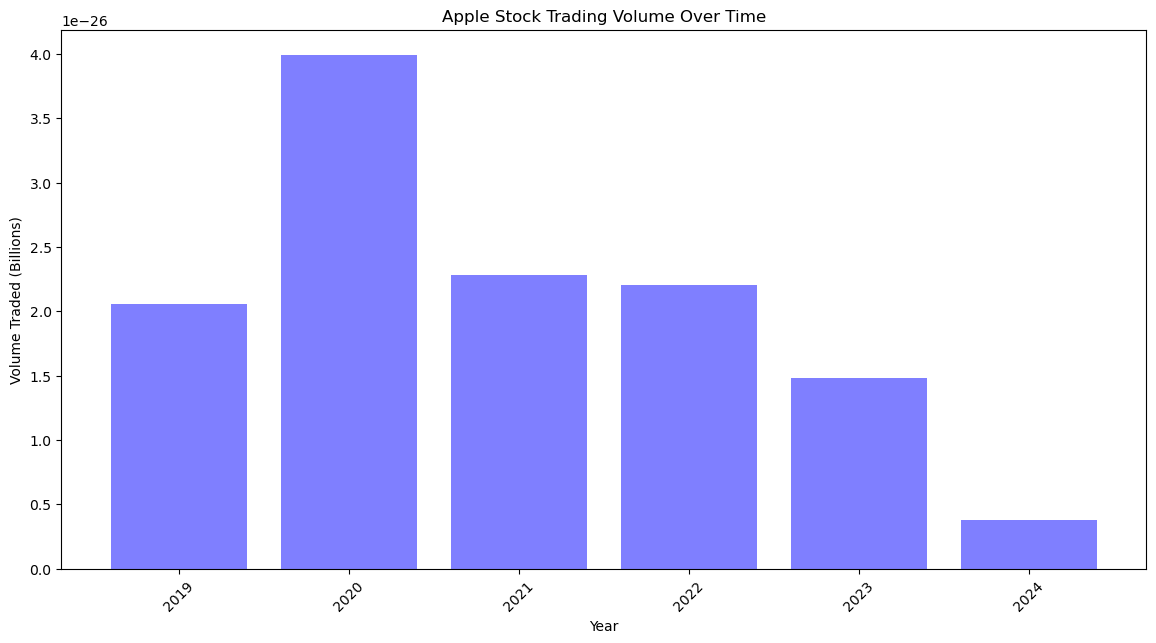

In [73]:
# volume traded over years 

# Convert the 'Volume' column to billions by dividing each value by 1e9
volume_by_year['Volume'] = volume_by_year['Volume'] / 1e9

# Aggregated volume traded over years, in billions
plt.figure(figsize=(14, 7))
plt.bar(volume_by_year['Year'], volume_by_year['Volume'], color='blue', alpha=.5)

plt.title('Apple Stock Trading Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Volume Traded (Billions)')

plt.xticks(volume_by_year['Year'], rotation=45) 

plt.show()




In [77]:
# Calculate daily price changes
df['Price Change'] = df['Close/Last'] - df['Open']

price_change_stats = df['Price Change'].describe()
print(price_change_stats)


count    1258.000000
mean        0.124061
std         1.985704
min        -7.080000
25%        -0.848750
50%         0.130000
75%         1.246250
max        10.160000
Name: Price Change, dtype: float64


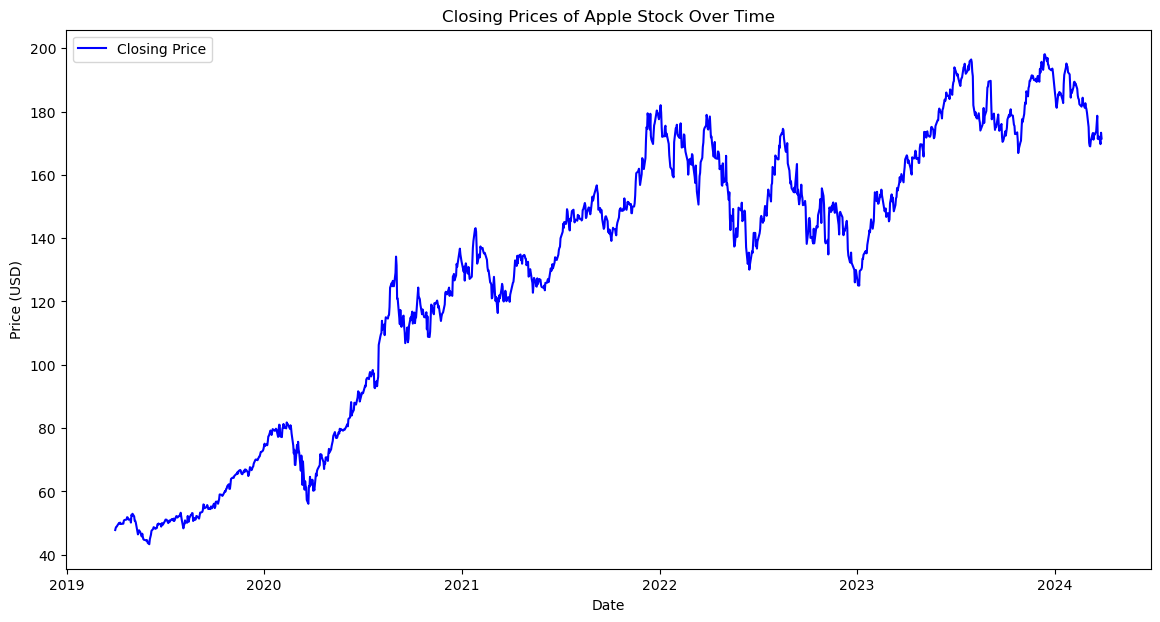

In [76]:
# stock closing price over time 

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close/Last'], label='Closing Price', color='blue')
plt.title('Closing Prices of Apple Stock Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


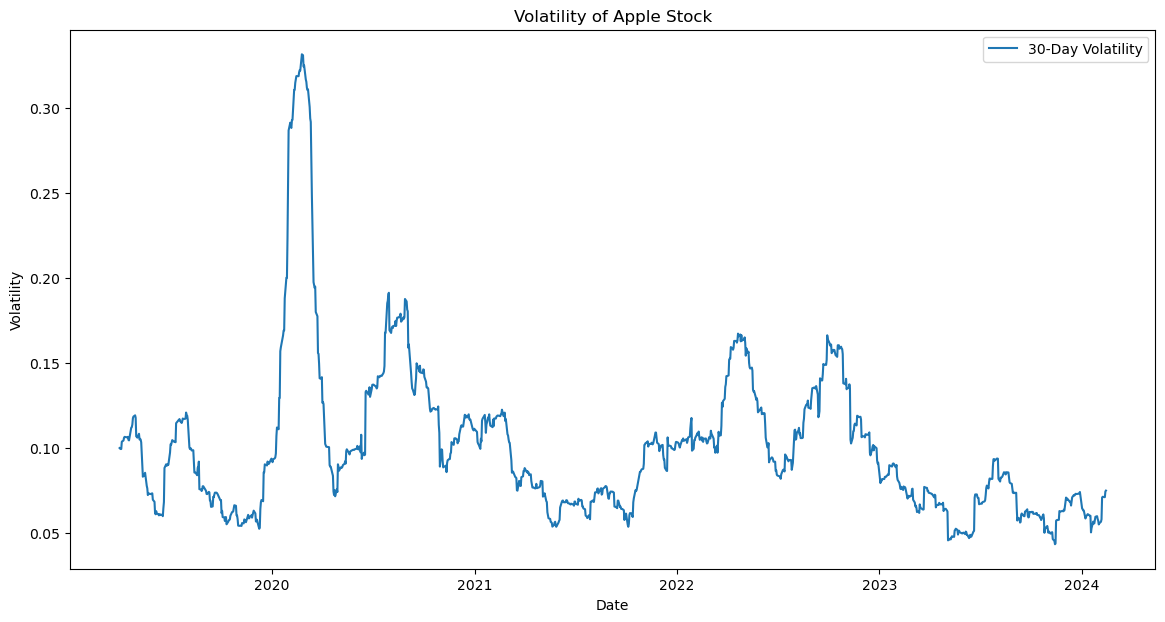

In [78]:
# Calculate daily returns
df['Returns'] = df['Close/Last'].pct_change()

# Calculate rolling 30-day volatility
df['Volatility'] = df['Returns'].rolling(window=30).std() * np.sqrt(30)

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volatility'], label='30-Day Volatility')
plt.title('Volatility of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
